In [1]:
import numpy as np
from qiskit import *

In [2]:
from qiskit.visualization import plot_histogram

In [3]:
def ansatz(theta):
    cir = QuantumCircuit(2)
    cir.rx(np.pi, 0)
    cir.ry(np.pi/2, 1)
    cir.rx(-np.pi/2, 0)
    cir.cx(1,0)
    cir.rz(float(theta),0)
    cir.cx(1,0)
    cir.rx(np.pi/2, 0)
    cir.ry(-np.pi/2, 1)
    ansatz = cir.to_gate()
    ansatz.name = "$\Psi(\Theta)$" 
    return ansatz

In [4]:
def meas(ansatz_theta,s):
    circ = QuantumCircuit(2)
    circ.append(ansatz_theta, range(2))
    circ.barrier()
    if s=="ZI" or s=="IZ" or s=="ZZ":
        circ.measure_all()
    if s=="XX":
        circ.ry(-np.pi/2,0)
        circ.ry(-np.pi/2,1)
        circ.measure_all()
    if s=="YY":
        circ.rx(np.pi/2,0)
        circ.rx(np.pi/2,1)
        circ.measure_all()
    return circ    

In [5]:
backend = BasicAer.get_backend('qasm_simulator')

In [6]:
def test(dict):
    if not "00" in dict:
        dict["00"]=0
    if not "01" in dict:
        dict["01"]=0
    if not "10" in dict:
        dict["10"]=0
    if not "11" in dict:
        dict["11"]=0
    return dict

In [7]:
def energy(theta):
    E=np.zeros(5)
    ansatz_theta=ansatz(theta)  
    circuit0 = meas(ansatz_theta, "ZI")
    result0 = execute(circuit0, backend, shots=shots_number).result()
    counts0  = test(result0.get_counts(circuit0))
    E[0]=g[r,1]*(counts0['00']+counts0['10']-counts0['01']-counts0['11'])/shots_number
    circuit1 = meas(ansatz_theta, "IZ")
    result1 = execute(circuit1, backend, shots=shots_number).result()
    counts1  = test(result1.get_counts(circuit1))
    E[1]=g[r,2]*(counts1["00"]-counts1["10"]+counts1["01"]-counts1["11"])/shots_number
    circuit2 = meas(ansatz_theta, "ZZ")
    result2 = execute(circuit2, backend, shots=shots_number).result()
    counts2  = test(result2.get_counts(circuit2))
    E[2]=g[r,3]*(counts2["00"]-counts2["10"]-counts2["01"]+counts2["11"])/shots_number
    circuit3 = meas(ansatz_theta, "XX")
    result3 = execute(circuit3, backend, shots=shots_number).result()
    counts3  = test(result3.get_counts(circuit3))
    E[3]=g[r,4]*(counts3["00"]-counts3["10"]-counts3["01"]+counts3["11"])/shots_number
    circuit4 = meas(ansatz_theta, "YY")
    result4 = execute(circuit4, backend, shots=shots_number).result()
    counts4  = test(result4.get_counts(circuit4))  
    E[4]=g[r,5]*(counts4["00"]-counts4["10"]-counts4["01"]+counts4["11"])/shots_number
    #Esum=np.sum(E)
    return E

In [8]:
g=np.array([[2.1868, 0.5449, -1.2870, 0.6719, 0.0798, 0.0798],[1.3827, 0.4982, -1.0226, 0.6537, 0.0815, 0.0815],[-0.3202, 0.4325, -0.7355, 0.6233, 0.0846, 0.0846],[-0.4804, 0.3435, -0.4347, 0.5716, 0.0910, 0.0910],[-0.5463, 0.2779, -0.2550, 0.5235, 0.0986, 0.0986],[-0.5685, 0.2286, -0.1413, 0.4812, 0.1067, 0.1067],[-0.5693, 0.1908, -0.0666, 0.4451, 0.1149, 0.1149],[-0.5597, 0.1615, -0.0166, 0.4148, 0.1226, 0.1226],[-0.5458, 0.1390, 0.0171, 0.3898, 0.1297, 0.1297]])

In [9]:
R=np.array([0.25,0.35,0.5,0.75,1.0,1.25,1.5,1.75,2.0])

In [10]:
r=2
shots_number=6000
energy(0.2)

array([-0.4251475, -0.7229965, -0.6233   , -0.0165816, -0.0165816])

In [37]:
shots_number=6000
r=2
ans=scipy.optimize.minimize(fun=energy, x0=0.0, method='COBYLA',tol=10**(-4))
ans.fun+g[r,0]

-2.125293233333333

In [40]:
shots_number=6000
r=2
ans=scipy.optimize.minimize(fun=energy, x0=0.0, method='Powell',tol=10**(-4))
ans.fun+g[r,0]

-2.1129946

In [11]:
import scipy
shots_number=65000
Energy=np.zeros(8)
for r in range(8):
    ans=scipy.optimize.minimize(fun=energy, x0=0.0, method='COBYLA',tol=10**(-4))
    Energy[r]=ans.fun+g[r,0]

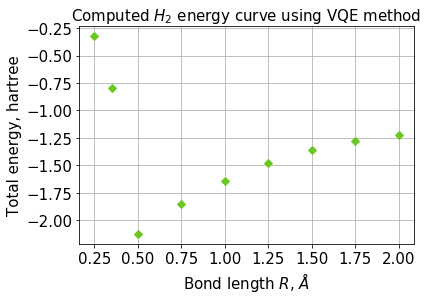

In [30]:
from matplotlib import pyplot as plt
import matplotlib.ticker as tck
%matplotlib inline
fig, ax = plt.subplots()
ax.plot(R,Energy,'D',color=[107/255,200/255,35/255], linewidth=5,label=r" ")

#ax.legend(loc='lower left', fontsize=13)
plt.title("Computed $H_2$ energy curve using VQE method", fontsize=15)
          # $\Theta_2$={theta[1]/np.pi}$\pi$") 
ax.set_ylabel("Total energy, hartree", fontsize=15)
ax.set_xlabel("Bond length $R$, $\AA$", fontsize=15)
#ax.set_xscale('log')
#ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
#ax.xaxis.set_major_locator(tck.MultipleLocator(base=1.0))
ax.grid()
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)

In [31]:
Energy

array([-0.32380747, -0.79958563, -2.12388094, -1.8505261 , -1.63803342,
       -1.47697646, -1.35908772, -1.27680579, -1.22220224])